## Classificação de imagem de dígitos com K-Means

### Importar as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits


### Carregar os dados 

A base de dados é uma array com 1797 linhas (uma pra cada imagem) com 64 elementos cada. Esses 64 elementos representam cada pixel de uma imagem com 8x8 pixels. 

In [2]:
digits = load_digits()
data = digits.data

print(data.shape)
data

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

As características ou propriedades de cada objeto (imagem) são as intensidades de cinza de cada pixel. Ou seja, temos, para cada imagem, 64
propriedades.

Vamos visualizar o primeiro dígito do nosso banco de dados.

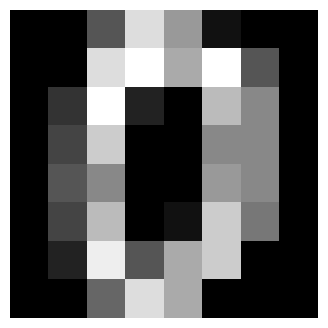

In [3]:
plt.figure(figsize=(4,4))

image = data[0, :]
image = image.reshape(8, 8)
plt.imshow(image, cmap='gray', aspect='equal')  
plt.axis('off')
plt.show()


Para melhorar a visualização, invertemos as cores, de modo a ficamos com o fundo da imagem branco e o contorno dos dígitos em preto. 

No processamento de imagem, as intensidades de pixel normalmente variam de 0 a 255, onde 0 representa preto e 255 representa branco. Portanto, subtrair cada valor de intensidade de 255 inverte essencialmente as cores da imagem.

In [4]:
data = 255-data

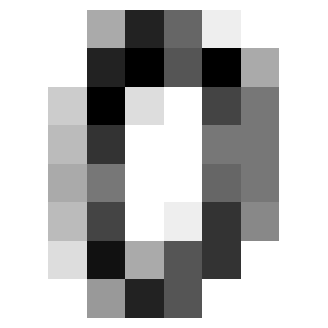

In [5]:
plt.figure(figsize=(4,4))

image = data[0, :]
image = image.reshape(8, 8)
plt.imshow(image, cmap='gray', aspect='equal')  
plt.axis('off')
plt.show()


### K-Means

Fixamos a semente para obter os centróides iniciais, para que os resultados aqui obtidos sejam repetíveis.

In [6]:
np.random.seed(42)

Como temos 10 dígitos diferentes (de 0 a 9) optamos por agrupar as imagens em 10 clusters

In [7]:
k = 10

Criar o modelo K-Means.


In [8]:
# Carregar a instância do modelo com k clusters
kmeans = KMeans(n_clusters=k, init='random')
# Treinar o modelo
kmeans.fit(data)

KMeans(init='random', n_clusters=10)

In [9]:
kmeans_clusters = kmeans.predict(data)

Vamos plotar os resultados.|

cluster 0
182 elements


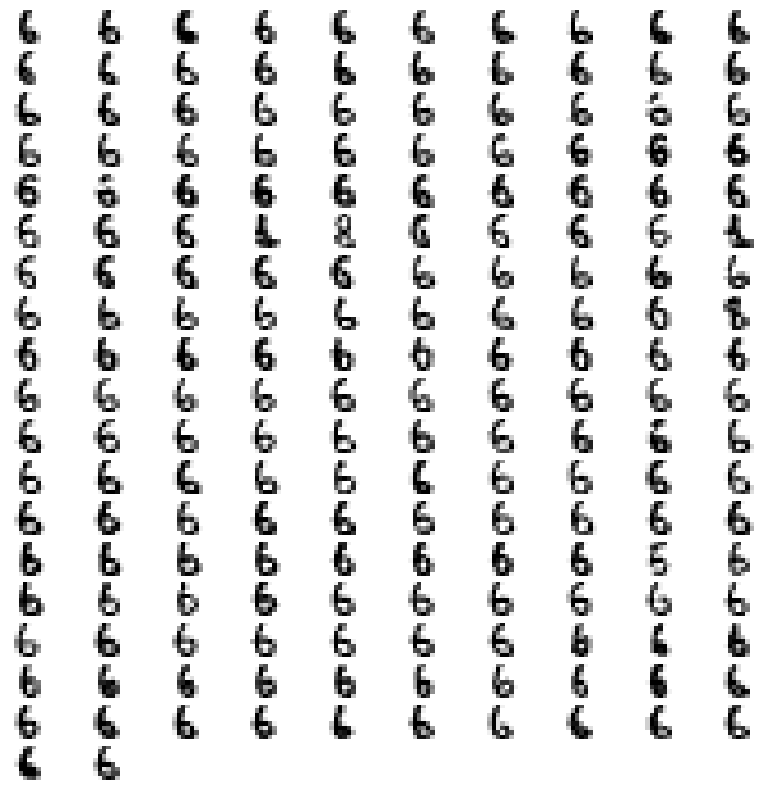

cluster 1
96 elements


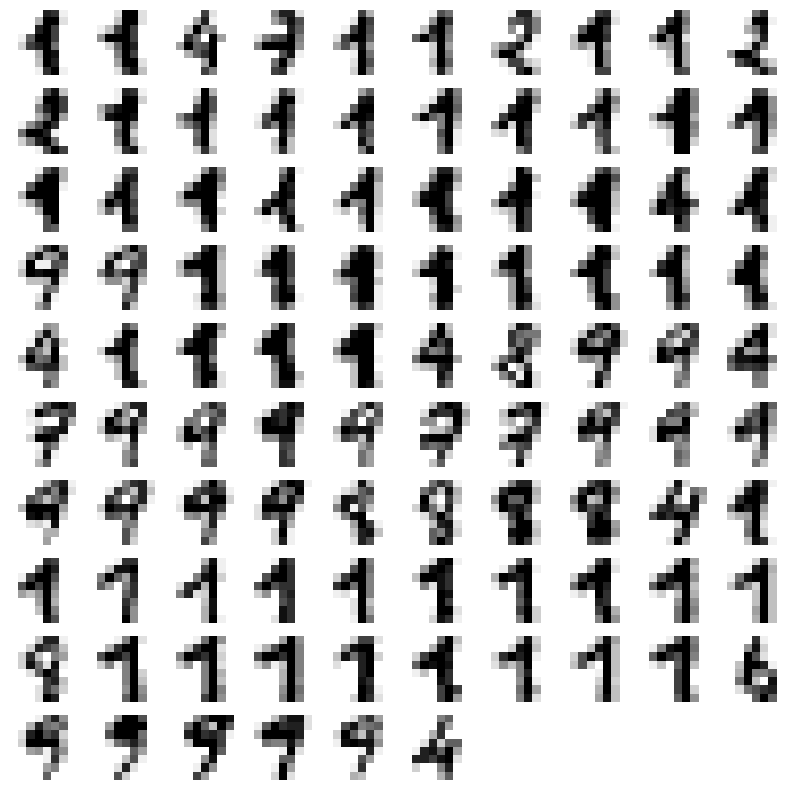

cluster 2
175 elements


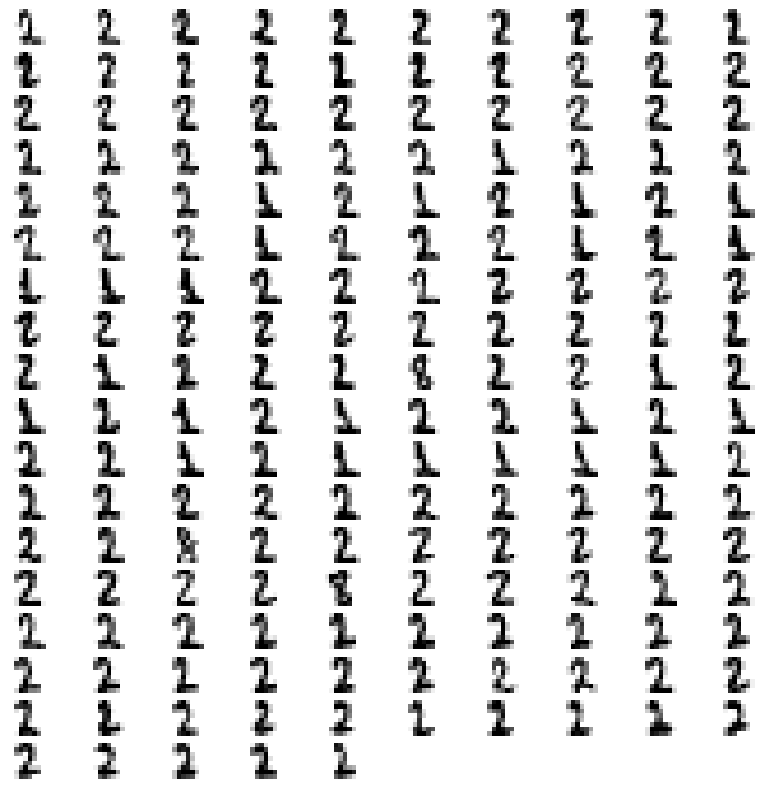

cluster 3
194 elements


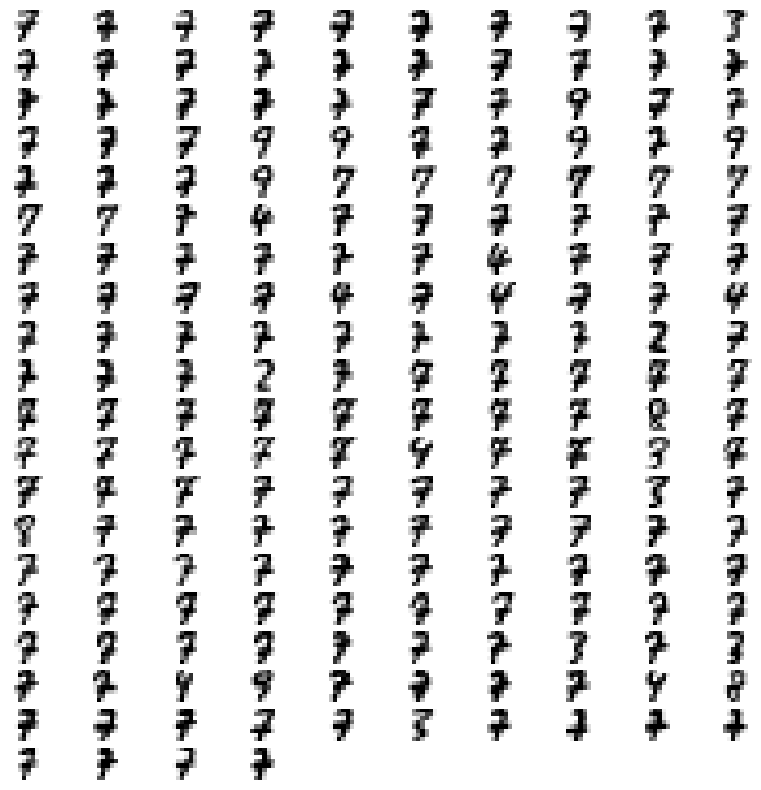

cluster 4
225 elements


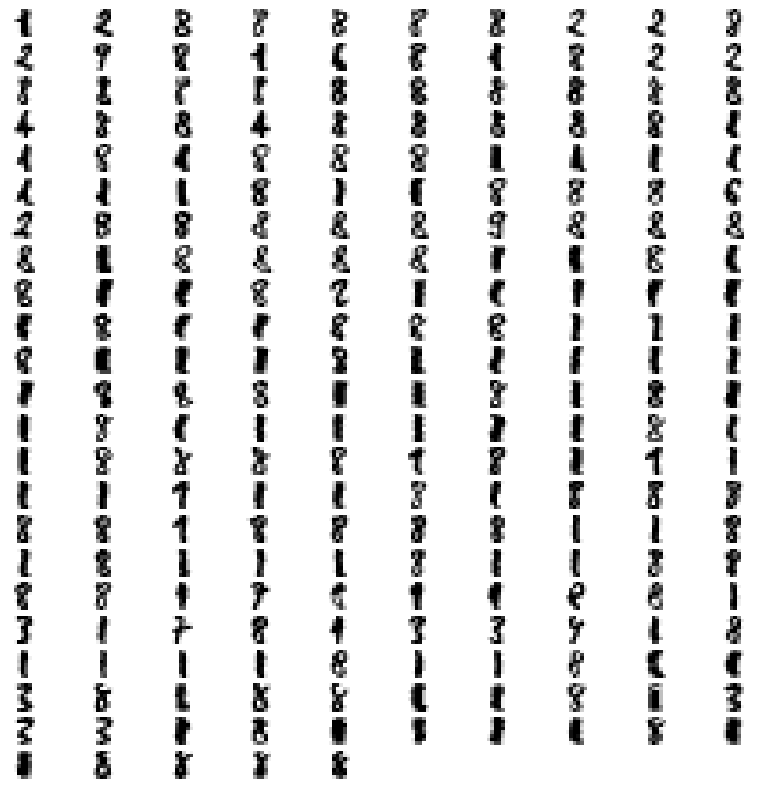

cluster 5
179 elements


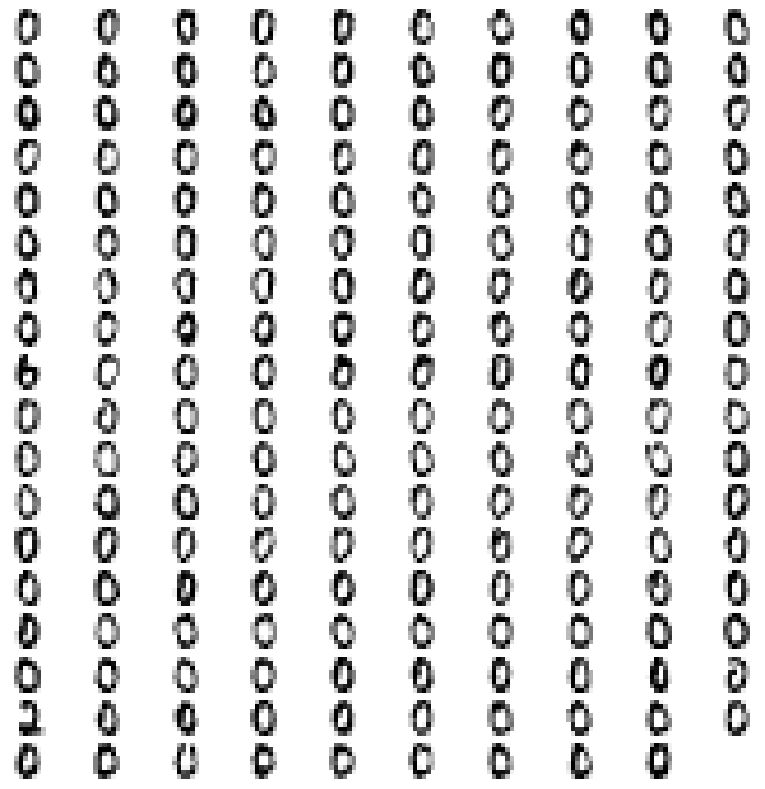

cluster 6
244 elements


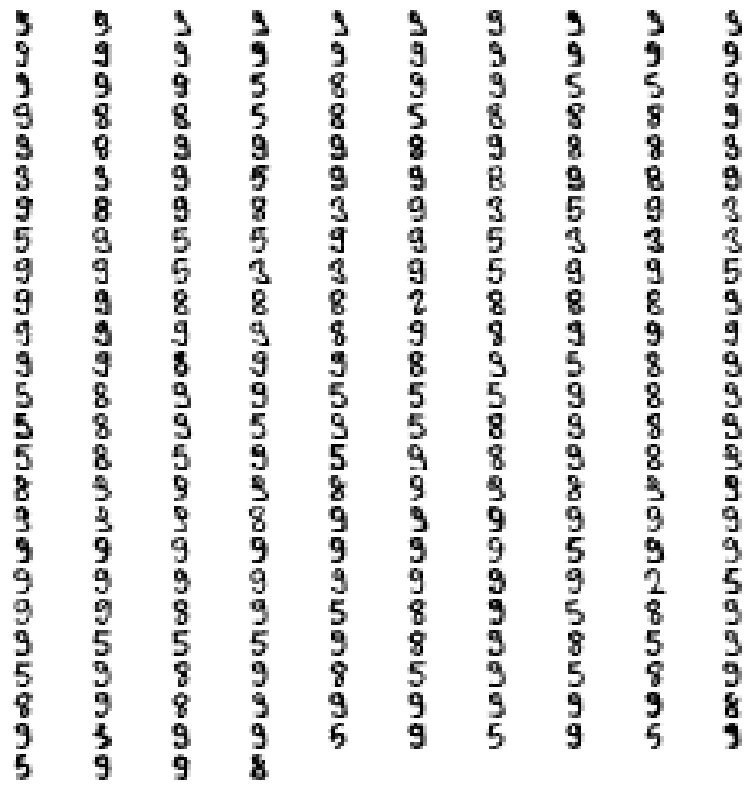

cluster 7
156 elements


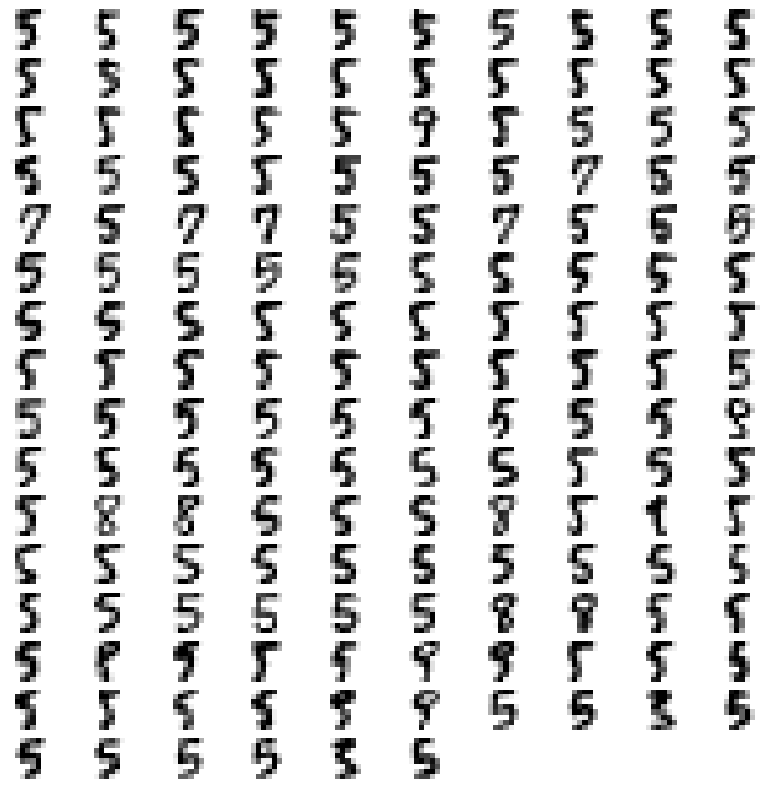

cluster 8
180 elements


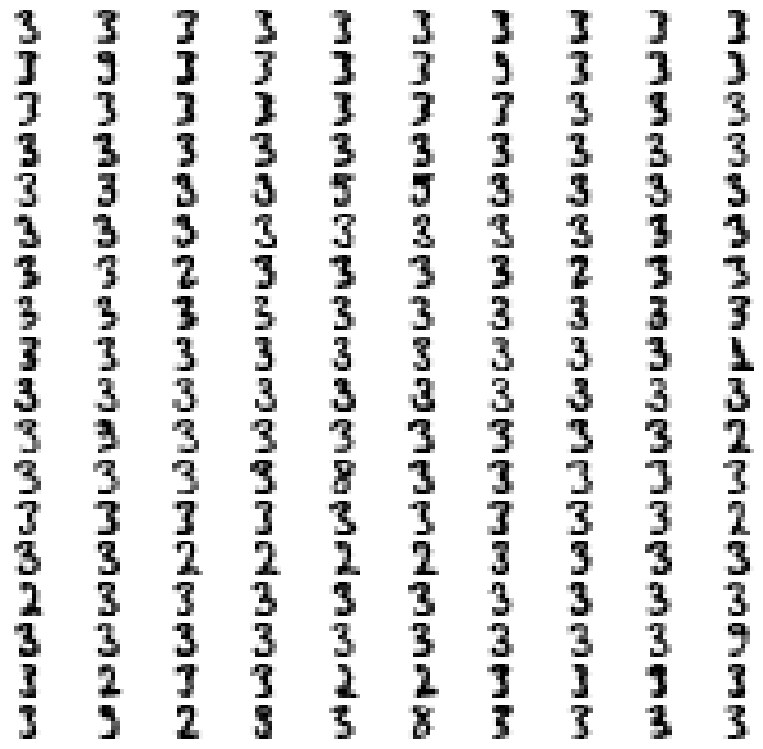

cluster 9
166 elements


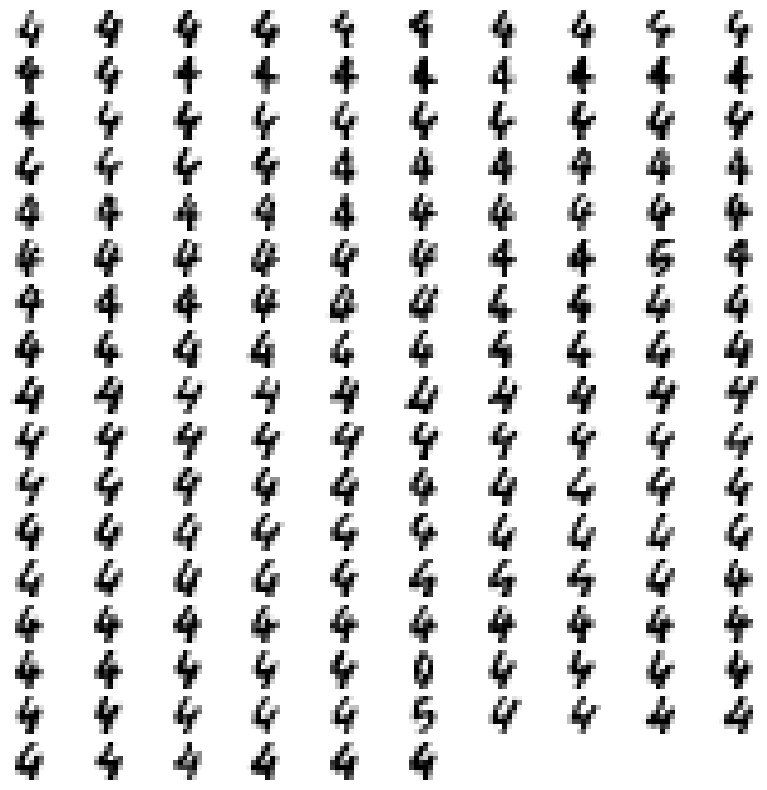

In [10]:
for i in range(0,k):

    row = np.where(kmeans_clusters==i)[0]  
    num = row.shape[0]      
    r = np.floor(num/10.)    

    print("cluster "+str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(int(r+1), 10, int(k+1))
        image = data[row[k], ]
        image = image.reshape(8, 8)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()